# Stock Price 55 Days Breakout and 52 weeks high

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [95]:
pd.set_option('display.max_rows', None)

In [96]:
import warnings
warnings.filterwarnings("ignore")

In [116]:
# df = pd.read_csv("Downloads/CANBK.NS.csv")
df = pd.read_csv("Downloads/YESBANK.NS.csv")
# INDUSINDBK.NS
# df = pd.read_csv("Downloads/TITAGARH.NS.csv")
# df = pd.read_csv("Downloads/INDUSINDBK.NS.csv")

In [117]:
df.shape

(248, 7)

In [118]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Sort the data by date in ascending order
df.sort_values(by='Date', inplace=True)

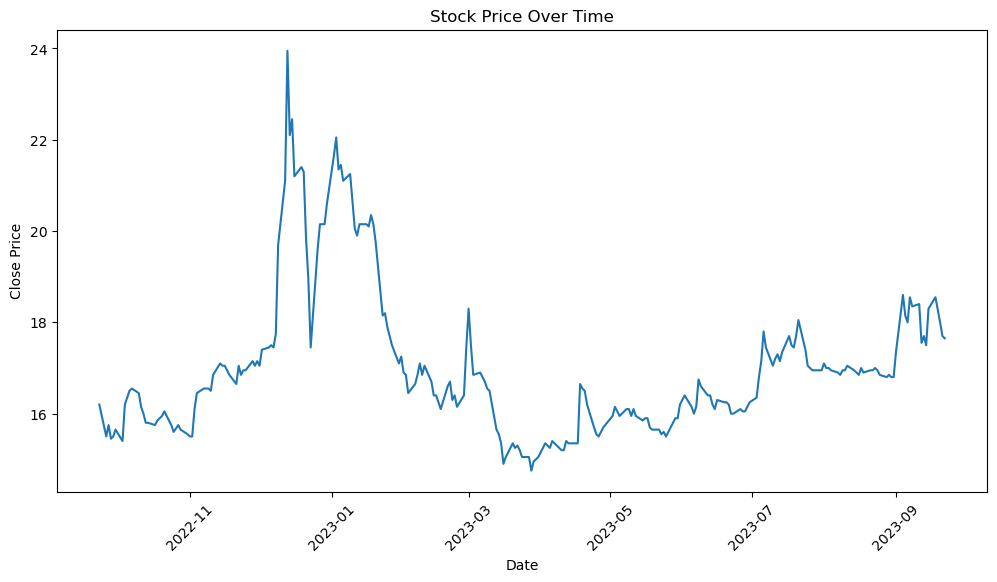

In [119]:
plt.figure(figsize=(12, 6))
sns.lineplot(x= 'Date', y = 'Close', data = df)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Over Time')

plt.show()

In [120]:
# Calculate the rolling 55-day high
df['55_Days_Close_max'] = df['Close'].shift(1).rolling(window=55).max()

# Determine breakout days
df['Breakout'] = df['Close'] > df['55_Days_Close_max']


In [121]:
df_True = df[df['Breakout'] == 1]
df_True

,Date,Open,High,Low,Close,Adj Close,Volume,55_Days_Close_max,Breakout
174,2023-06-08,16.200001,17.200001,16.150000,16.750000,16.750000,307712828,16.650000,True
191,2023-07-04,16.400000,17.200001,16.250000,16.799999,16.799999,323137498,16.750000,True
192,2023-07-05,16.850000,17.450001,16.799999,17.150000,17.150000,214341757,16.799999,True
193,2023-07-06,17.250000,17.950001,17.250000,17.799999,17.799999,264919299,17.150000,True
204,2023-07-21,17.700001,18.200001,17.600000,18.049999,18.049999,242664132,17.799999,True
234,2023-09-04,17.450001,19.000000,17.450001,18.600000,18.600000,776578716,18.049999,True


Text(0.5, 1.0, 'Yes Bank')

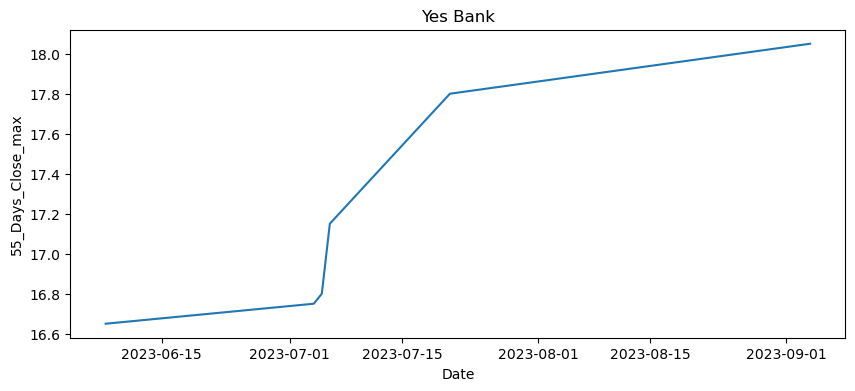

In [130]:
plt.figure(figsize=(10, 4))
sns.lineplot(x = 'Date', y = '55_Days_Close_max', data = df_True)
plt.title("Yes Bank")

In [123]:
df_True.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,55_Days_Close_max,Breakout
174,2023-06-08,16.200001,17.200001,16.15,16.750000,16.750000,307712828,16.65,True
191,2023-07-04,16.400000,17.200001,16.25,16.799999,16.799999,323137498,16.75,True


In [124]:
df_True['Month'] = df_True['Date'].dt.month

In [125]:
df_True['Year'] = df_True['Date'].dt.year

In [126]:
df_True.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,55_Days_Close_max,Breakout,Month,Year
174,2023-06-08,16.200001,17.200001,16.15,16.750000,16.750000,307712828,16.65,True,6,2023
191,2023-07-04,16.400000,17.200001,16.25,16.799999,16.799999,323137498,16.75,True,7,2023


In [127]:
df_month_year = df_True.groupby(['Year', 'Month'])['Breakout'].sum().reset_index()
df_month_year

,Year,Month,Breakout
0,2023,6,1
1,2023,7,4
2,2023,9,1


In [128]:
df_max_close_price = df['Close'].max()
df_max_close_price

23.950001

In [129]:
df_52_weeks_high = df[df['Close'] == df_max_close_price]
df_52_weeks_high.Date

54   2022-12-13
Name: Date, dtype: datetime64[ns]